In [2]:
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv("csv files\insurance_data (1).csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


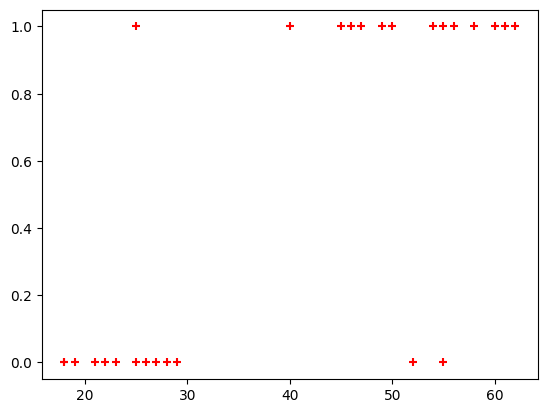

In [6]:
plt.scatter(df.age, df.bought_insurance, marker="+", color='red')

In [7]:
df.shape

(27, 2)

In [8]:
#splitting into training and testing set
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, train_size=0.9)

In [10]:
X_test

,age
8,62
7,60
6,55


In [11]:
X_train

,age
2,47
26,23
0,22
13,29
24,50
25,54
1,25
14,49
12,27
21,26


In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [14]:
model.fit(X_train, y_train)

LogisticRegression()

In [15]:
model.predict(X_test)

array([1, 1, 1], dtype=int64)

In [17]:
model.score(X_test, y_test)

0.6666666666666666

HR Analytics dataset: https://www.kaggle.com/datasets/giripujar/hr-analytics/data

In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [19]:
df = pd.read_csv("csv files/HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [20]:
#Check which variables have direct and clear impact on employee retention
df.satisfaction_level.unique()

array([0.38, 0.8 , 0.11, 0.72, 0.37, 0.41, 0.1 , 0.92, 0.89, 0.42, 0.45,
       0.84, 0.36, 0.78, 0.76, 0.09, 0.46, 0.4 , 0.82, 0.87, 0.57, 0.43,
       0.13, 0.44, 0.39, 0.85, 0.81, 0.9 , 0.74, 0.79, 0.17, 0.24, 0.91,
       0.71, 0.86, 0.14, 0.75, 0.7 , 0.31, 0.73, 0.83, 0.32, 0.54, 0.27,
       0.77, 0.88, 0.48, 0.19, 0.6 , 0.12, 0.61, 0.33, 0.56, 0.47, 0.28,
       0.55, 0.53, 0.59, 0.66, 0.25, 0.34, 0.58, 0.51, 0.35, 0.64, 0.5 ,
       0.23, 0.15, 0.49, 0.3 , 0.63, 0.21, 0.62, 0.29, 0.2 , 0.16, 0.65,
       0.68, 0.67, 0.22, 0.26, 0.99, 0.98, 1.  , 0.52, 0.93, 0.97, 0.69,
       0.94, 0.96, 0.18, 0.95])

In [21]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [24]:
df.shape

(14999, 10)

In [25]:
df.drop_duplicates(inplace=True)

In [26]:
left = df[df.left == 1]
left.shape

(1991, 10)

In [27]:
retained = df[df.left == 0]
retained.shape

(10000, 10)

In [28]:
df1 = df[['salary', 'Department']]
df1

,salary,Department
0,low,sales
1,medium,sales
2,medium,sales
3,low,sales
4,low,sales
...,...,...
11995,high,management
11996,high,management
11997,high,management
11998,high,marketing


In [29]:
df.Department = pd.to_numeric(df.Department, errors='coerce')
df.salary = pd.to_numeric(df.salary, errors='coerce')
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
left,,,,,,,,,
0,0.667365,0.715667,3.786800,198.94270,3.262000,0.174500,0.019500,NaN,NaN
1,0.440271,0.721783,3.883476,208.16223,3.881467,0.052737,0.004018,NaN,NaN


From above table we can draw following conclusions,

Satisfaction Level: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66) Average Monthly Hours: Average monthly hours are higher in employees leaving the firm (199 vs 207) Promotion Last 5 Years: Employees who are given promotion are likely to be retained at firm

<Axes: xlabel='salary'>

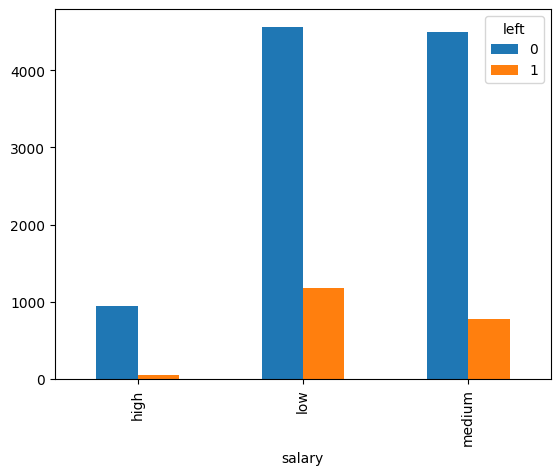

In [30]:
pd.crosstab(df1.salary, df.left).plot(kind='bar')

Employees with low salaries are likely to leave

<Axes: xlabel='Department'>

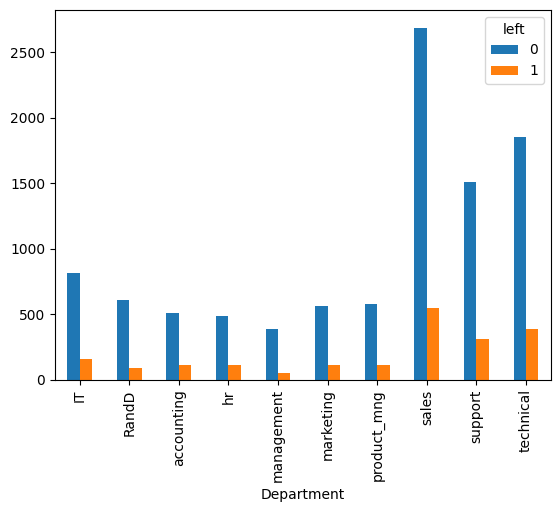

In [31]:
pd.crosstab(df1.Department, df.left).plot(kind='bar')

From the above chart we will ignore department since there isnt a lot of impact in the graph

In [32]:
new_df = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years']]
new_df

,satisfaction_level,average_montly_hours,promotion_last_5years
0,0.38,157,0
1,0.80,262,0
2,0.11,272,0
3,0.72,223,0
4,0.37,159,0
...,...,...,...
11995,0.90,259,1
11996,0.74,266,1
11997,0.85,185,1
11998,0.33,172,1


In [33]:
new_df = new_df.merge(df1[['salary']], how='left', left_index=True, right_index=True)

In [34]:
new_df

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low
...,...,...,...,...
11995,0.90,259,1,high
11996,0.74,266,1,high
11997,0.85,185,1,high
11998,0.33,172,1,high


In [35]:
salary_dummies = pd.get_dummies(new_df.salary, prefix='salary')

In [36]:
df_with_dummies = pd.concat([new_df, salary_dummies], axis=1)

In [37]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False


In [38]:
df_with_dummies.drop('salary', axis=1, inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [39]:
X = df_with_dummies
y = df.left

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3)

In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [42]:
model.fit(X_train, y_train)

C:\Users\RAINA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
model.predict(X_test)

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [44]:
X_test

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
3201,0.67,217,0,True,False,False
1709,0.10,269,0,False,False,True
1331,0.09,297,0,False,True,False
10117,0.35,204,0,False,False,True
5323,0.62,150,0,False,False,True
...,...,...,...,...,...,...
370,0.37,142,0,False,True,False
7610,0.49,185,0,False,False,True
10220,0.57,210,0,False,True,False
5419,0.74,204,0,False,True,False


In [45]:
model.score(X_test, y_test)

0.856325947105075